In [34]:
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, grid_search, cross_validation, preprocessing
from collections import Counter
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm

from statsmodels.graphics.mosaicplot import mosaic

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 17)

%matplotlib inline
plt.style.use('ggplot')

In [77]:
df_overdoses = pd.read_csv(os.path.join('overdoses-cleaned.csv')) 
df_opioids = pd.read_csv(os.path.join('opioids.csv'))
df_prescriber= pd.read_csv(os.path.join('prescriber-info-cleaned.csv'))
df_prescriber_old= pd.read_csv(os.path.join('prescriber-info.csv'))
df= pd.read_csv(os.path.join('aggregatedInfo-clean.csv'))



In [78]:
df

,Unnamed: 0,State,Gender,Specialty,OpioidP,NumGender,NumState,NumSpeciality,StateNumber,StateName,Population,Deaths
0,1,AK,F,General,0,1,1,4,2,Alaska,735132,124
1,2,AK,F,General,1,1,1,4,2,Alaska,735132,124
2,3,AK,M,Surgeon,1,2,1,1,2,Alaska,735132,124
3,4,AK,F,General,0,1,1,4,2,Alaska,735132,124
4,5,AK,F,General,1,1,1,4,2,Alaska,735132,124
...,...,...,...,...,...,...,...,...,...,...,...,...
24675,24676,WY,F,other,0,1,53,2,50,Wyoming,582658,109
24676,24677,WY,M,General,1,2,53,4,50,Wyoming,582658,109
24677,24678,WY,F,General,1,1,53,4,50,Wyoming,582658,109
24678,24679,WY,M,General,1,2,53,4,50,Wyoming,582658,109


In [13]:
df_overdoses 

,Unnamed: 0,State,Population,Deaths,Abbrev
0,1,Alabama,4833722,723,AL
1,2,Alaska,735132,124,AK
2,3,Arizona,6626624,1211,AZ
3,4,Arkansas,2959373,356,AR
4,5,California,38332521,4521,CA
...,...,...,...,...,...
45,46,Virginia,8260405,980,VA
46,47,Washington,6971406,979,WA
47,48,West Virginia,1854304,627,WV
48,49,Wisconsin,5742713,853,WI


In [14]:
df_opioids

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN
...,...,...
108,XODOL 7.5-300,HYDROCODONE/ACETAMINOPHEN
109,XYLON 10,HYDROCODONE/IBUPROFEN
110,ZAMICET,HYDROCODONE/ACETAMINOPHEN
111,ZOHYDRO ER,HYDROCODONE BITARTRATE


In [15]:
df_prescriber 

,Unnamed: 0,BRIMONIDINE.TARTRATE,DIPHENOXYLATE.ATROPINE,DORZOLAMIDE.TIMOLOL,FELODIPINE.ER,IPRATROPIUM.BROMIDE,LITHIUM.CARBONATE,ONDANSETRON.ODT,ONGLYZA,PHENOBARBITAL,SEROQUEL.XR,ZIPRASIDONE.HCL,Opioid.Prescriber
0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,0,0,0,0,0,0,0,0,0,0,0,1
24996,24997,0,0,0,0,0,0,0,0,0,0,0,1
24997,24998,0,0,0,0,0,0,12,0,0,0,0,1
24998,24999,0,0,0,0,0,0,0,0,0,0,0,1


In [180]:
print"Describtion of Death Overdoses \n", df_overdoses.Deaths.describe()

df_maxOD= df_overdoses[df_overdoses.Deaths==df_overdoses.Deaths.max()]
df_minOD= df_overdoses[df_overdoses.Deaths==df_overdoses.Deaths.min()]

print "State with the highest", df_maxOD.iat[0, 1], "with the population of", df_maxOD.iat[0, 2], "and Death rate of", df_maxOD.iat[0, 3]
print "State with the lowest", df_minOD.iat[0, 1], "with the population of", df_minOD.iat[0, 2], "and Death rate of", df_minOD.iat[0, 3]

Describtion of Death Overdoses 
count      50.000000
mean      939.180000
std       898.195486
min        43.000000
25%       281.000000
50%       712.000000
75%      1209.750000
max      4521.000000
Name: Deaths, dtype: float64
State with the highest California with the population of 38332521 and Death rate of 4521
State with the lowest North Dakota with the population of 723393 and Death rate of 43


In [142]:
normpop= preprocessing.normalize(df_overdoses.Population, norm='l2')

normpop
#overdoses/populartion *100000

#df_overdoses["PopNorm"]= pd.Series(normpop, index=df_overdoses.index) 

/Users/lgayhardt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/lgayhardt/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.07259269,  0.01104019,  0.09951843,  0.04444377,  0.5756766 ,
         0.07912017,  0.05400582,  0.01390287,  0.29364424,  0.15006205,
         0.02108604,  0.02421101,  0.1934635 ,  0.0986816 ,  0.04641177,
         0.04346136,  0.0660084 ,  0.06946516,  0.0199484 ,  0.08903874,
         0.10051262,  0.14861214,  0.0814031 ,  0.04492185,  0.09077117,
         0.01524572,  0.02806131,  0.04190218,  0.01987567,  0.13364999,
         0.03131677,  0.29512001,  0.14789786,  0.01086389,  0.17377003,
         0.05782771,  0.05902159,  0.19183654,  0.01579156,  0.07170838,
         0.01268834,  0.09755639,  0.39719814,  0.0435652 ,  0.00941071,
         0.1240545 ,  0.10469636,  0.02784788,  0.08624388,  0.00875034]])

In [143]:
def OD_pop(row):
    return (row.Deaths/row.Population)*100000

df_overdoses['Norm']=OD_pop(df_overdoses)
df_overdoses.head()

,Unnamed: 0,State,Population,Deaths,Abbrev,Norm
0,1,Alabama,4833722,723,AL,14.957418
1,2,Alaska,735132,124,AK,16.867719
2,3,Arizona,6626624,1211,AZ,18.274766
3,4,Arkansas,2959373,356,AR,12.029575
4,5,California,38332521,4521,CA,11.794163


In [179]:
df_maxOD_norm= df_overdoses[df_overdoses.Norm==df_overdoses.Norm.max()]
df_minOD_norm= df_overdoses[df_overdoses.Norm==df_overdoses.Norm.min()]

print "State with the highest rate of death overdoses per capita ", df_maxOD_norm.iat[0, 1],"with the popluation of", df_maxOD_norm.iat[0, 2],"and Death rate of", df_maxOD_norm.iat[0, 3]
print "State with the lowest rate of death overdoses per capita", df_minOD_norm.iat[0, 1],"with the popluation of", df_minOD_norm.iat[0, 2],"and Death rate of", df_minOD_norm.iat[0, 3]



State with the highest rate of death overdoses per capita  West Virginia with the popluation of 1854304 and Death rate of 627
State with the lowest rate of death overdoses per capita North Dakota with the popluation of 723393 and Death rate of 43


In [151]:
print"Describtion of Gender of Prescribers \n", df_prescriber_old.Gender.describe()
print"New Describtion of Gender of Prescribers \n", df.Gender.describe()


Describtion of Gender of Prescribers 
count     25000
unique        2
top           M
freq      15574
Name: Gender, dtype: object
New Describtion of Gender of Prescribers 
count     24680
unique        2
top           M
freq      15362
Name: Gender, dtype: object


In [152]:
print"Describtion of State of Prescribers \n", df_prescriber_old.State.describe()
print"New Describtion of State of Prescribers \n", df.State.describe()

Describtion of State of Prescribers 
count     25000
unique       57
top          CA
freq       2562
Name: State, dtype: object
New Describtion of Gender of Prescribers 
count     24680
unique       50
top          CA
freq       2562
Name: State, dtype: object


In [153]:
print"Describtion of Specialty of Prescribers \n", df_prescriber_old.Specialty.describe()
print"New Describtion of Specialty of Prescribers \n", df.Specialty.describe()

Describtion of Specialty of Prescribers 
count                 25000
unique                  109
top       Internal Medicine
freq                   3194
Name: Specialty, dtype: object
New Describtion of Specialty of Prescribers 
count     24680
unique        4
top       other
freq      12513
Name: Specialty, dtype: object


In [28]:
print"Describtion of Credentials of Prescribers \n", df_prescriber_old.Credentials.describe()

Describtion of Credentials of Prescribers 
count     24237
unique      887
top          MD
freq       7034
Name: Credentials, dtype: object


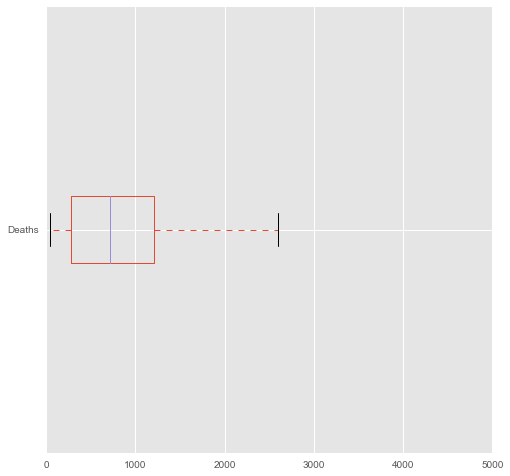

In [23]:
df_overdoses.Deaths.plot(kind = 'box', figsize = (8, 8), vert = False)

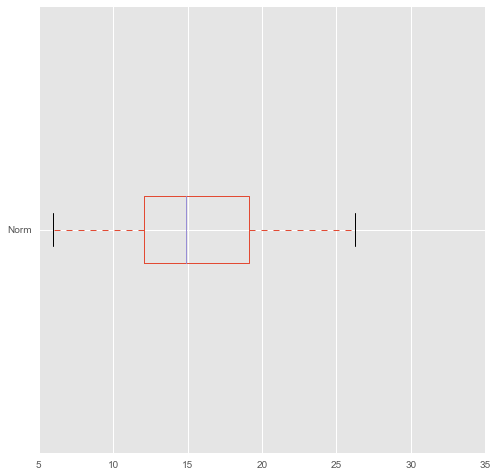

In [22]:
df_overdoses.Norm.plot(kind = 'box', figsize = (8, 8), vert = False)

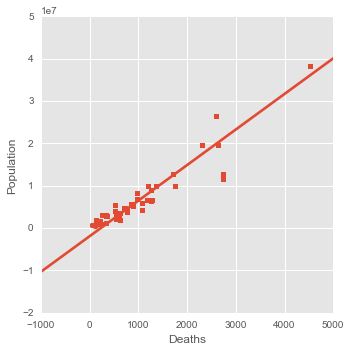

In [187]:
sns.lmplot('Deaths', 'Population', df)

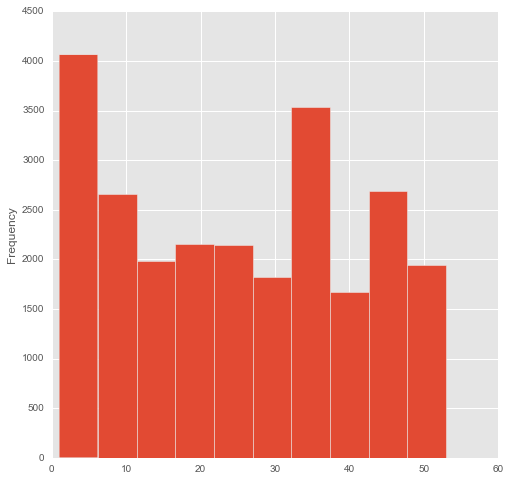

In [189]:
df.NumState.plot(kind = 'hist', figsize = (8, 8))

In [ ]:
model = smf.ols(formula = 'SalePrice ~ IsAStudio', data = df_prescriber).fit()

model.summary()

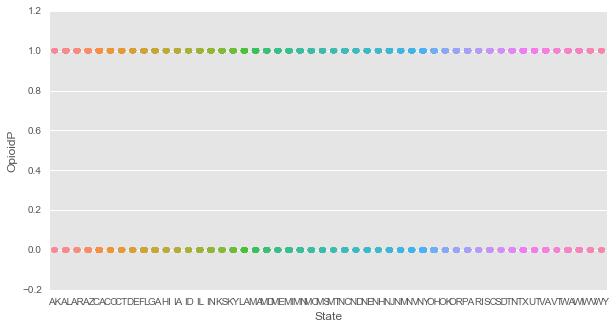

In [155]:
sns.stripplot(x="State", y="OpioidP", data=df, jitter=True);

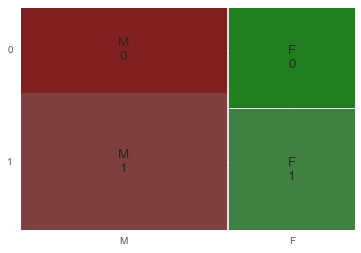

In [35]:
plt.rcParams['font.size'] = 16.0
mosaic(df_prescriber_old, ['Gender', 'Opioid.Prescriber']);

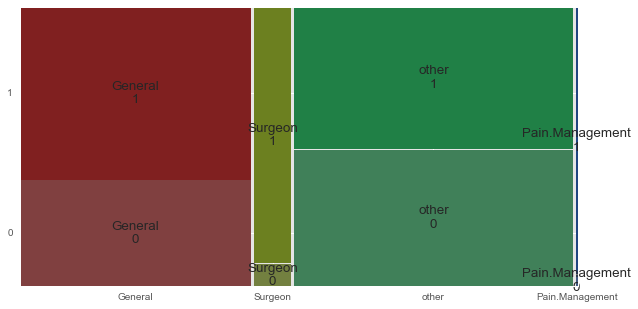

In [126]:
plt.rcParams['font.size'] = 16.0
mosaic(df, ['Specialty', 'OpioidP']);

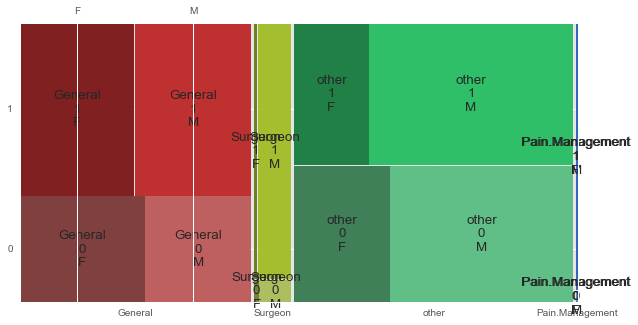

In [134]:
plt.rcParams['font.size'] = 16.0
plt.rcParams['figure.figsize'] = 10, 5
m= mosaic(df, ['Specialty', 'OpioidP','Gender']);


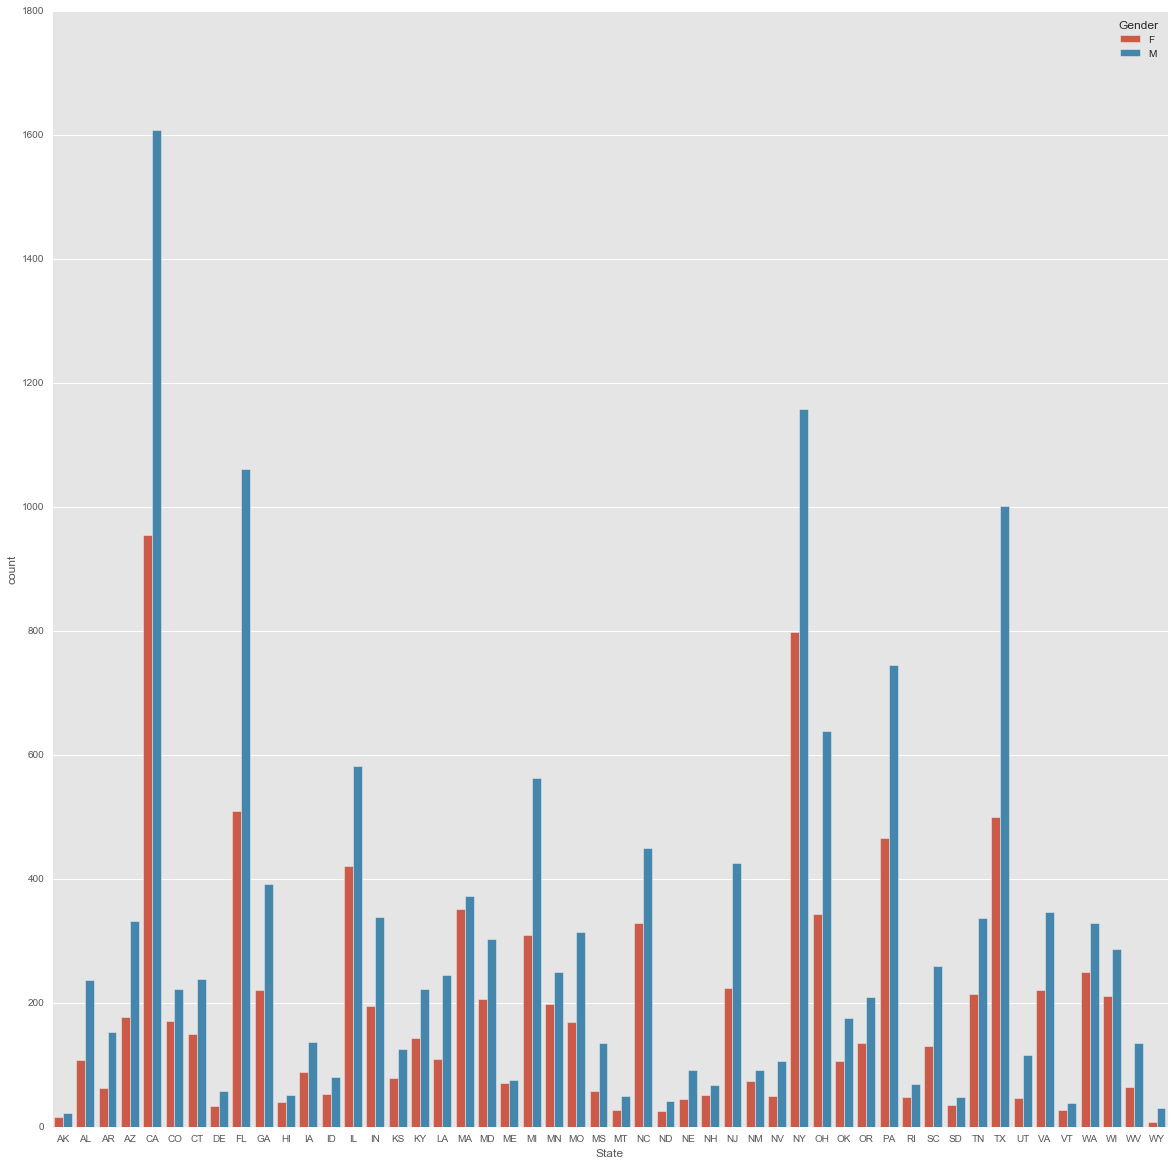

In [190]:
f, ax = plt.subplots(figsize=(20, 20),)
sns.countplot(x="State",hue='Gender', data=df);
plt.rcParams.update({'font.size': 10})


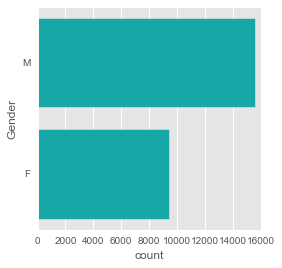

In [56]:
f, ax = plt.subplots(figsize=(4, 4),)
sns.countplot(y="Gender", data=df_prescriber_old, color="c");
plt.rcParams.update({'font.size': 10})


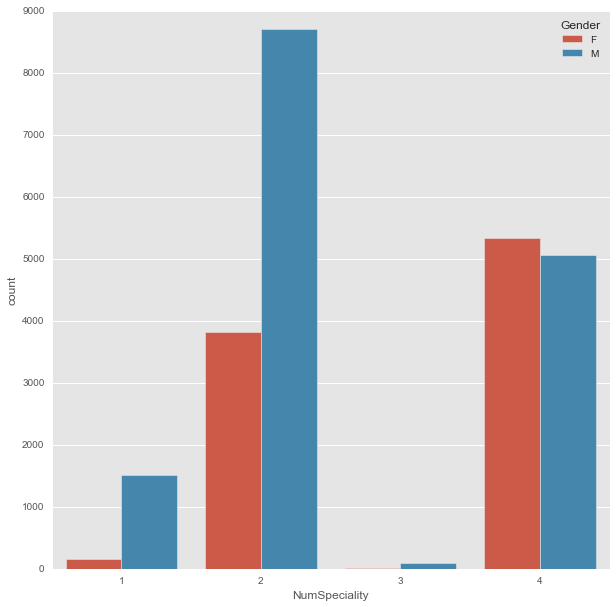

In [191]:
f, ax = plt.subplots(figsize=(10, 10),)
sns.countplot(x="NumSpeciality",hue='Gender', data=df);
plt.rcParams.update({'font.size': 10})


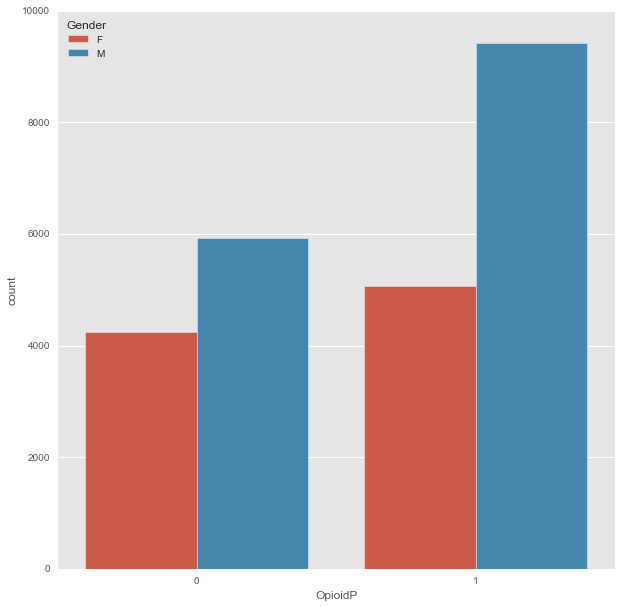

In [192]:
f, ax = plt.subplots(figsize=(10, 10),)
sns.countplot(x="OpioidP",hue='Gender', data=df);
plt.rcParams.update({'font.size': 10})


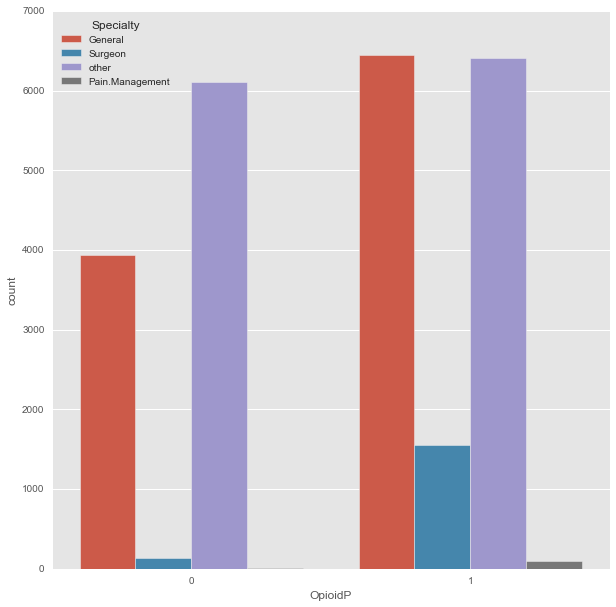

In [193]:
f, ax = plt.subplots(figsize=(10, 10),)
sns.countplot(x="OpioidP",hue='Specialty', data=df);
plt.rcParams.update({'font.size': 10})

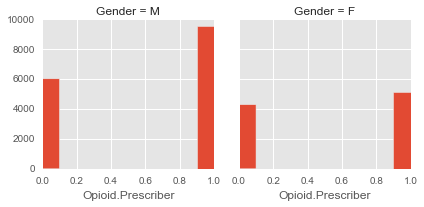

In [60]:
g = sns.FacetGrid(df_prescriber_old, col="Gender")
g.map(plt.hist, "Opioid.Prescriber");

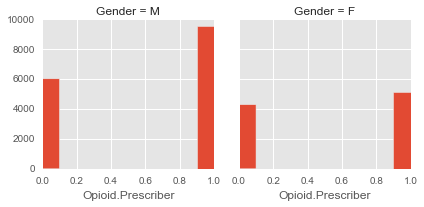

In [62]:
g = sns.FacetGrid(df_prescriber_old, col="Gender")
g.map(plt.hist, "Opioid.Prescriber");

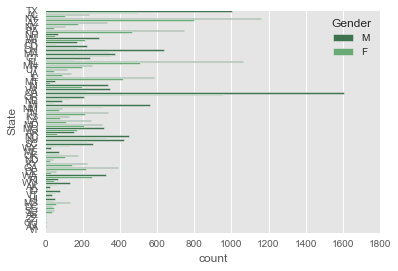

In [64]:
sns.countplot(y="State", hue="Gender", data=df_prescriber_old, palette="Greens_d");

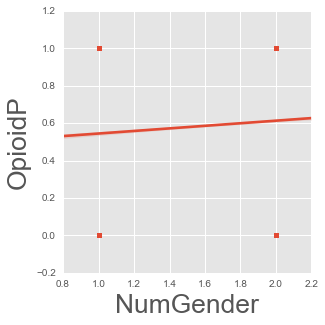

In [79]:
sns.lmplot('NumGender', 'OpioidP', df)

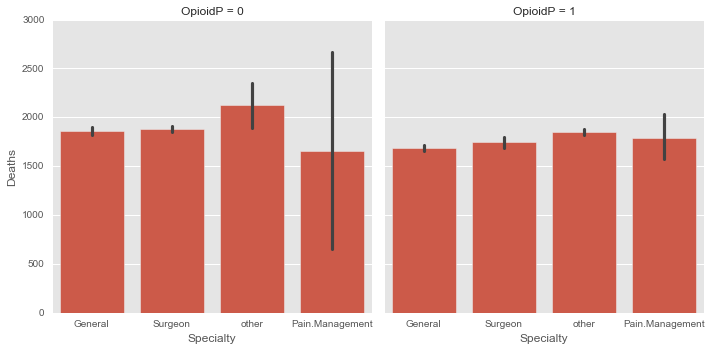

In [177]:
g = sns.FacetGrid(df, col="OpioidP", size=5, aspect=1)
g.map(sns.barplot, "Specialty", "Deaths");



In [87]:
model_gender = smf.ols(formula = 'OpioidP ~ NumGender', data = df).fit()
model_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OpioidP   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sat, 03 Dec 2016   Prob (F-statistic):           1.83e-26
Time:                        02:26:10   Log-Likelihood:                -17471.
No. Observations:               24680   AIC:                         3.495e+04
Df Residuals:                   24678   BIC:                         3.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4761      0.011     43.599      0.000         0.455     0.498
NumGender      0.0687      0.006     10.658      0.000         0.056     0.081
==============================================================================
Omnibus:                      486.196   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4056.259
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                       1.144   Cond. No.                         7.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model_state = smf.ols(formula = 'OpioidP ~ NumState', data = df).fit()
model_state.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OpioidP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2009
Date:                Sat, 03 Dec 2016   Prob (F-statistic):              0.654
Time:                        02:26:20   Log-Likelihood:                -17527.
No. Observations:               24680   AIC:                         3.506e+04
Df Residuals:                   24678   BIC:                         3.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5853      0.006     95.437      0.000         0.573     0.597
NumState     9.23e-05      0.000      0.448      0.654        -0.000     0.000
==============================================================================
Omnibus:                      491.781   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4129.735
Skew:                          -0.356   Prob(JB):                         0.00
Kurtosis:                       1.127   Cond. No.                         58.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
model_spe = smf.ols(formula = 'OpioidP ~ NumSpeciality ', data = df).fit()
model_spe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OpioidP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.257
Date:                Sat, 03 Dec 2016   Prob (F-statistic):             0.0391
Time:                        02:26:40   Log-Likelihood:                -17525.
No. Observations:               24680   AIC:                         3.505e+04
Df Residuals:                   24678   BIC:                         3.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.5709      0.009     65.645      0.000         0.554     0.588
NumSpeciality     0.0060      0.003      2.063      0.039         0.000     0.012
==============================================================================
Omnibus:                      491.387   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4127.090
Skew:                          -0.356   Prob(JB):                         0.00
Kurtosis:                       1.127   Cond. No.                         9.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model_state_gender = smf.ols(formula = 'OpioidP ~ NumSpeciality + NumGender', data = df).fit()
model_state_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OpioidP   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     69.03
Date:                Sat, 03 Dec 2016   Prob (F-statistic):           1.27e-30
Time:                        02:26:53   Log-Likelihood:                -17459.
No. Observations:               24680   AIC:                         3.492e+04
Df Residuals:                   24677   BIC:                         3.495e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.4213      0.016     27.049      0.000         0.391     0.452
NumSpeciality     0.0149      0.003      4.937      0.000         0.009     0.021
NumGender         0.0771      0.007     11.567      0.000         0.064     0.090
==============================================================================
Omnibus:                      486.241   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4041.270
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                       1.148   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
model_state_gender = smf.ols(formula = 'OpioidP ~ NumSpeciality + NumState', data = df).fit()
model_state_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OpioidP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.220
Date:                Sat, 03 Dec 2016   Prob (F-statistic):              0.109
Time:                        12:21:32   Log-Likelihood:                -17525.
No. Observations:               24680   AIC:                         3.506e+04
Df Residuals:                   24677   BIC:                         3.508e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.5687      0.010     56.132      0.000         0.549     0.589
NumSpeciality     0.0060      0.003      2.059      0.039         0.000     0.012
NumState       8.835e-05      0.000      0.429      0.668        -0.000     0.000
==============================================================================
Omnibus:                      491.369   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4126.970
Skew:                          -0.356   Prob(JB):                         0.00
Kurtosis:                       1.127   Cond. No.                         99.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

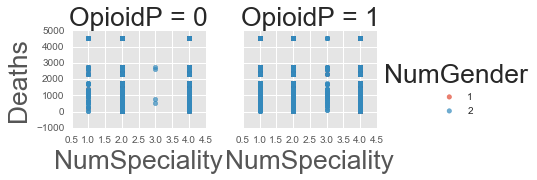

In [86]:
g = sns.FacetGrid(df, col="OpioidP", hue="NumGender")
g.map(plt.scatter, "NumSpeciality", "Deaths", alpha=0.7)
g.add_legend();

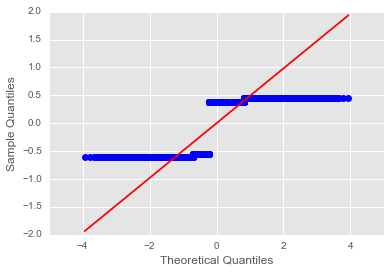

In [96]:
figure = sm.qqplot(model_gender.resid, line = 's')

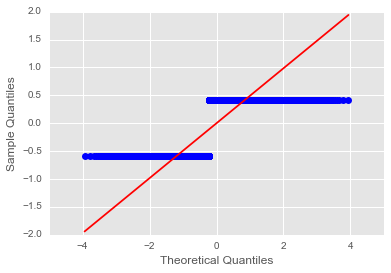

In [97]:
figure1 = sm.qqplot(model_state.resid, line = 's')

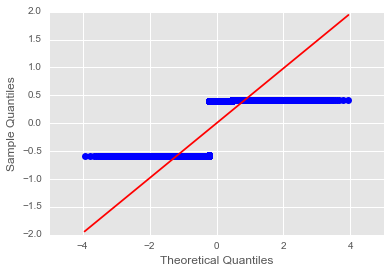

In [98]:
figure2 = sm.qqplot(model_spe.resid, line = 's')

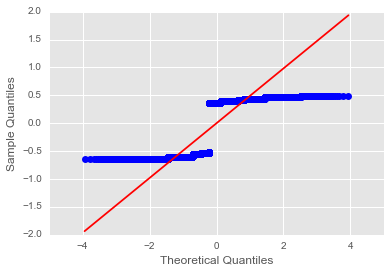

In [99]:
figure3 = sm.qqplot(model_state_gender.resid, line = 's')

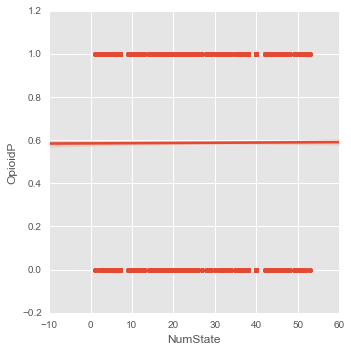

In [103]:
sns.lmplot('NumState', 'OpioidP', df)

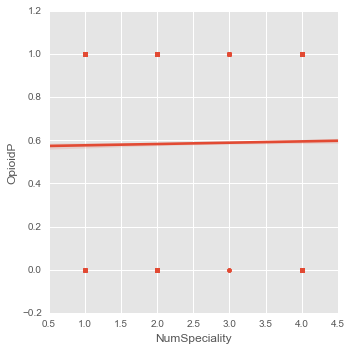

In [104]:
sns.lmplot('NumSpeciality', 'OpioidP', df)

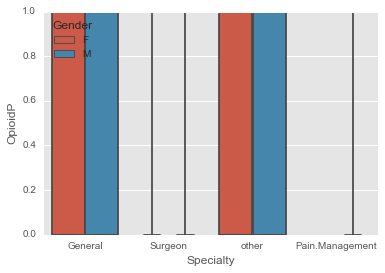

In [108]:
sns.boxplot(x="Specialty", y="", hue="Gender", data=df);